# Sentimental Analysis

In [1]:
import numpy as np
import pandas as pd
from wordcloud import WordCloud  # used to generate a visual representation of word frequency, where more frequent words appear larger in the cloud.
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer  #onverts a collection of text documents into a matrix of TF-IDF (Term Frequency-Inverse Document Frequency) features, which helps in transforming text data into numerical features for machine learning
from sklearn.svm import SVC  #Support Vector Classification model that performs classification tasks by finding the optimal hyperplane that separates different classes in the feature space.
from sklearn.metrics import classification_report   #generates a detailed report of the precision, recall, and F1-score for each class in a classification model
import nltk  #Natural Language Toolkit for processing and analyzing human language data
from nltk.corpus import stopwords  #provides a list of common words (like "and", "the") that are often excluded from text processing because they do not contribute much meaning.
from nltk.tokenize import word_tokenize  #splits text into individual words or tokens.
nltk.download('stopwords')   #download necessary resources for stopwords and tokenization.
nltk.download('punkt')
import string           #provides common string operations and constants, such as punctuation characters.
import warnings
warnings.filterwarnings('ignore')     #suppresses warning messages during code execution to avoid cluttering the output.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [2]:
pip install emoji

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 553.2/553.2 kB 14.4 MB/s eta 0:00:00


In [3]:
pip install transformers pandas

In [4]:
from transformers import pipeline

In [5]:
import emoji
from textblob import TextBlob

In [6]:
import pandas as pd

# Reading from Excel
df = pd.read_excel('final_data.xlsx')
df.head(25)

,Review
0,Play Video\nThis is my first iPhone and it alw...
1,The iPhone 13 128GB has surpassed my expectati...
2,I finally upgraded from my trusty iPhone 5s to...
3,I snagged the iPhone 13 during the Great India...
4,I really wanted to get an iPhone and it is my ...
5,Things I liked:\n1. Solid Build Quality and ve...
6,I've been using the Apple iPhone 13 (Blue) for...
7,I am happy to share that my personal review. i...
8,This is my first iPhone and it always feels go...
9,"After purchasing the iPhone 13, I’m genuinely ..."


In [7]:
df.shape

(1039, 1)

In [8]:
stop_words=set(stopwords.words('english'))     #Text processing
stop_words                #creates a set of English stop words using the NLTK library.

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

# HANDLING NEGATION

In [9]:
df.drop_duplicates(inplace=True)    #only works on dataframes
df.shape

(995, 1)

In [10]:
df.dropna(inplace=True)   #droping missing values (if any)
df.shape

(995, 1)

In [11]:
def preprocess_text(text):                 #this line ensures that the output is a cleaned and tokenized string where each word is separated by a space
    tokens=word_tokenize(text)                 #Tokenize the Text: splits the input text into individual words or tokens.
    tokens=[word.lower() for word in tokens]   #convert to lower case: converts all tokens to lowercase to ensure uniformity and avoid case-sensitive mismatches.
    tokens=[word for word in tokens if word not in string.punctuation]     #Remove stopwords: filters out any punctuation marks from the tokens, keeping only the actual words.
    tokens=[word for word in tokens if word not in stop_words]     #It iterates through the tokens list and keeps only those words that are not in the stop_words set. This step removes common words like "the," "is," "and," etc., which are often deemed less meaningful in text analysis.
    return " ".join(tokens)                  # joins the list of tokens into a single string with each token separated by a space. This step converts the list of words back into a single text string,


In [12]:
#Apply preprocessing to the sentence column
df['Processed_text']=df['Review'].apply(preprocess_text)
df.head()

,Review,Processed_text
0,Play Video\nThis is my first iPhone and it alw...,play video first iphone always feels good hold...
1,The iPhone 13 128GB has surpassed my expectati...,iphone 13 128gb surpassed expectations every a...
2,I finally upgraded from my trusty iPhone 5s to...,finally upgraded trusty iphone 5s iphone 13 le...
3,I snagged the iPhone 13 during the Great India...,snagged iphone 13 great indian festival unbeat...
4,I really wanted to get an iPhone and it is my ...,really wanted get iphone first iphone loved so...


In [13]:
#Drop the original sentence colmn if needed
df.drop(columns=['Review'], inplace=True)

In [14]:
def convert_emojis_to_text(text):
    return emoji.demojize(text)

# Apply the function to the reviews column
df['Review_text'] = df['Processed_text'].apply(convert_emojis_to_text)
df.head()

,Processed_text,Review_text
0,play video first iphone always feels good hold...,play video first iphone always feels good hold...
1,iphone 13 128gb surpassed expectations every a...,iphone 13 128gb surpassed expectations every a...
2,finally upgraded trusty iphone 5s iphone 13 le...,finally upgraded trusty iphone 5s iphone 13 le...
3,snagged iphone 13 great indian festival unbeat...,snagged iphone 13 great indian festival unbeat...
4,really wanted get iphone first iphone loved so...,really wanted get iphone first iphone loved so...


In [15]:
#Drop the original sentence colmn if needed
df.drop(columns=['Processed_text'], inplace=True)


In [16]:
# Save cleaned data to a new CSV file if needed
df.to_csv('cleaned_dataset_final.csv', index=False)

In [17]:
df.head(32)

,Review_text
0,play video first iphone always feels good hold...
1,iphone 13 128gb surpassed expectations every a...
2,finally upgraded trusty iphone 5s iphone 13 le...
3,snagged iphone 13 great indian festival unbeat...
4,really wanted get iphone first iphone loved so...
5,things liked 1 solid build quality polished so...
6,'ve using apple iphone 13 blue six months 's f...
7,happy share personal review iphone smooth hand...
8,first iphone always feels good hold masterpiec...
9,purchasing iphone 13 ’ genuinely impressed per...


In [18]:
print(len(df))

995


In [19]:
df.isnull().sum()

,0
Review_text,0


In [20]:
print(df.columns)


Index(['Review_text'], dtype='object')


In [21]:
if len(df) > 89:  # Make sure row 89 exists
    print(df.iloc[89])  # Safely access row 89
else:
    print("Row 89 does not exist in the dataset.")


Review_text    usb cable defective charging
Name: 90, dtype: object


In [22]:
# Check for null or empty reviews
print(df[df['Review_text'].isna() | (df['Review_text'] == '')])

# Remove empty rows
df = df.dropna(subset=['Review_text']).reset_index(drop=True)
df = df[df['Review_text'].str.strip().astype(bool)].reset_index(drop=True)

print(df.shape)  # Check the new shape of the DataFrame after cleaning


   Review_text
26            
(994, 1)


In [23]:
  # Remove rows with empty or missing review text
df = df.dropna(subset=['Review_text'])  # Remove rows where Review_text is NaN
df = df[df['Review_text'].str.strip().astype(bool)]  # Remove rows with empty or whitespace-only strings

# Reset the index after removing rows
df = df.reset_index(drop=True)

# Check the new shape of the DataFrame
print(df.shape)  # This will show the number of rows and columns after cleaning


(994, 1)


In [24]:
print(f"Total reviews after cleaning: {len(df)}")


Total reviews after cleaning: 994


In [25]:
import re

def handle_negation(text):
    # Define negation words
    negations = ["not","NOT", "no", "never", "none", "nothing", "nobody", "neither", "nowhere", "hardly", "scarcely", "barely","not impressive","low","not good","not bad","not satisfying","not worth"]
    words = text.split()

    transformed_text = []
    negate = False
    for word in words:
        # Check if the word is a negation
        if word in negations:
            negate = True
        elif negate:
            # Append 'NOT_' to the word following a negation
            transformed_text.append("NOT_" + word)
            negate = False
        else:
            transformed_text.append(word)

    return " ".join(transformed_text)

In [26]:
import re
import pandas as pd
from nltk.corpus import stopwords
import nltk
from nltk.corpus import words

# Download the NLTK 'words' corpus if you haven't already
nltk.download('words')
nltk.download('stopwords')

# Get a set of English words from the NLTK corpus
english_words = set(words.words())

# Initialize corpus
corpus = []

# Get stopwords in English
all_stopwords = set(stopwords.words('english'))

# Loop through each review and clean it
for i in range(len(df)):
    # Remove non-alphabetic characters and convert to lowercase
    review = re.sub('[^a-zA-Z]', ' ', df['Review_text'][i])
    review = handle_negation(df['Review_text'][i])
    review = review.lower()

    # Split the review into individual words
    review = review.split()

    # Keep only valid English words and remove stopwords
    review = [word for word in review if word in english_words and word not in all_stopwords]

    # Join the words back into a single string
    review = ' '.join(review)

    # Add the cleaned review to the corpus
    corpus.append(review)

# Create a new column in your DataFrame to store the cleaned reviews
df['cleaned_review'] = corpus

#Drop the original sentence colmn if needed
df.drop(columns=['Review_text'], inplace=True)

# Save the result to a new CSV file
df.to_csv('cleaned_final.csv', index=False)

df

[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,cleaned_review
0,play video first always good hold masterpiece ...
1,every aspect setting new standard excellence s...
2,finally trusty let tell like past future pink ...
3,snagged great festival unbeatable price let te...
4,really get first sound quality great fast phon...
...,...
989,new
990,set phone simple worked great put card phone g...
991,skeptical best purchase ever made made
992,reading seller hit miss really mine hit firstl...


In [27]:
print(corpus)

['play video first always good hold masterpiece premium everything feel premium however despite finish transition android apple smooth may constantly lack certain make life easy lite still phone feature forwarding anything forwarding anything bit step android entire process slow android user switcher apple could easily made switcher easy light swipe instead made long swipe man swipe make easy launch dialer always every android basic feature search contact directly phone dialer dialer used dialing number suggest similar contact last dial really bad dial number directly use dialer dial someone recent call log shift dial someone contact shift man done one button dialer android user miss badly sending multiple add file directly twice android one simple start select many send single click sending multiple go gallery folder select first share swipe based shifting status android switch status press button contact contact list method still mind man make easy example one first name middle name 

# Multilingual-BERT

In [28]:
# Load a multilingual BERT model for sentiment analysis
classifier = pipeline('sentiment-analysis', model="nlptown/bert-base-multilingual-uncased-sentiment")

# Define a function to classify sentiment
def get_sentiment_mbert(text):
    # Get the result from the BERT model
    result = classifier(text)[0]
    # The model may return scores for multiple labels (1 to 5 stars), so map it to 'positive' or 'negative'
    if int(result['label'][0]) > 3:  # Assuming 4-5 stars as positive
        return 'positive'
    else:
        return 'negative'



config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [29]:
# Apply the function to the 'review' column and create a new column for sentiment
df['Sentiment'] = df['cleaned_review'].apply(get_sentiment_mbert)



In [30]:
# Save the result back to the same file or a new one
df.to_csv('cleaned_dataset_final.csv', index=False)


In [31]:
# Output a few rows to verify
print(df.head())

                                      cleaned_review Sentiment
0  play video first always good hold masterpiece ...  negative
1  every aspect setting new standard excellence s...  positive
2  finally trusty let tell like past future pink ...  positive
3  snagged great festival unbeatable price let te...  positive
4  really get first sound quality great fast phon...  positive


In [32]:
sentiments_count=df['Sentiment'].value_counts()
sentiments_count

,count
Sentiment,
positive,711
negative,283


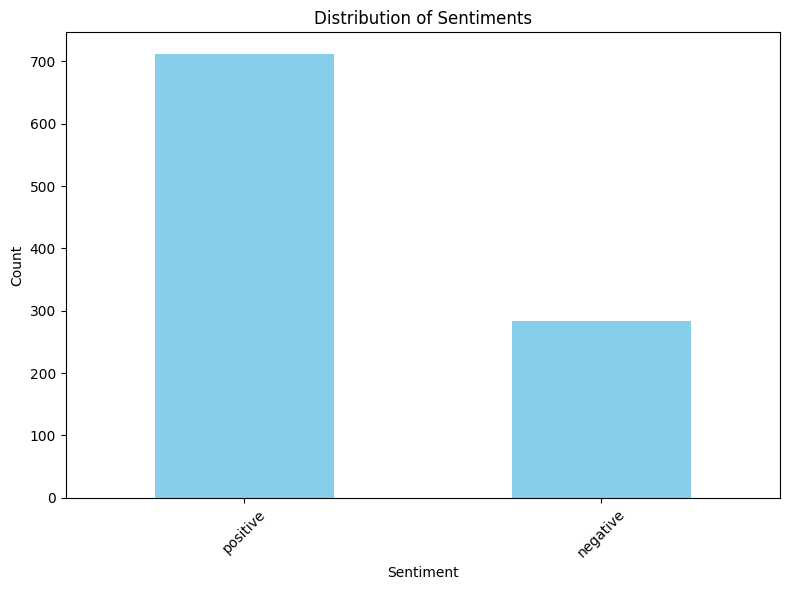

In [33]:
#Distribution plot of sentimental count
plt.figure(figsize=(8,6))
sentiments_count.plot(kind='bar',color='skyblue')
plt.title("Distribution of Sentiments")
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)   #Rotates the x-axis tick labels by 45 degrees for better readability.
plt.tight_layout()       #Adjusts subplot parameters to give some padding and ensure that the layout fits within the figure area.
plt.show()

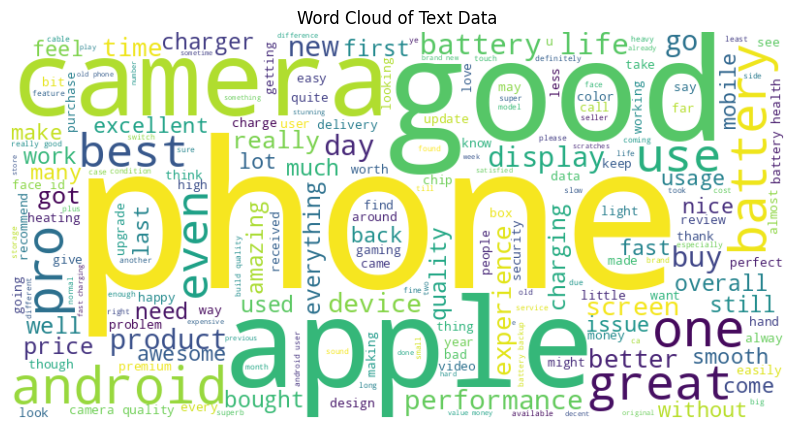

In [34]:
#Combine all sentences into single string
all_text= ' '.join(df['cleaned_review'])    #concatenates all the text entries in the Processed_text column into a single string with each entry separated by a space.

#Create a WordCloud Object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)  #initializes a WordCloud object with specified width, height, and background color.
#generates the WordCloud from the combined text.

# Plot the WordCloud
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')    #displays the WordCloud image with bilinear interpolation for smooth rendering.
plt.title('Word Cloud of Text Data')
plt.axis('off')
plt.show()

In [35]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer

# Define the vectorizer
vectorizer = CountVectorizer()

# Split your data into features and labels
X = vectorizer.fit_transform(df['cleaned_review'])
y = df['Sentiment']

# Initialize SMOTE
smote = SMOTE()

# Fit SMOTE to your data and generate a balanced dataset
X_resampled, y_resampled = smote.fit_resample(X, y)

In [36]:
#Feature Extraction
vectorizer=TfidfVectorizer()  # Initializes a TF-IDF Vectorizer to convert the text data into numerical features, reflecting the importance of each word in the dataset.
X=vectorizer.fit_transform(df['cleaned_review'])  #Transforms the 'Processed_text' column into a TF-IDF matrix, where each row represents a text entry and each column represents a word's importance.
y=df['Sentiment']   #Assigns the 'Sentiment' column as the target variable, containing the labels for sentiment analysis.

# Naive bayes

In [37]:
# # #Split dataset into training and testing sets
# # X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
# # #random_state=42 ensures that the split is consistent every time the code is run, making the results reproducible.


# from sklearn.naive_bayes import MultinomialNB
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import classification_report, confusion_matrix

# # Split the resampled data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

# # Initialize and train your model
# nb_model = MultinomialNB()
# nb_model.fit(X_train, y_train)

# # Make predictions
# y_pred = nb_model.predict(X_test)

# # Evaluate your model
# print(classification_report(y_test, y_pred))
# print(confusion_matrix(y_test, y_pred))


SVC

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)
#Build and Train model
svm_model=SVC(kernel='linear')  #initializes a Support Vector Machine (SVM) model with a linear kernel, which is suitable for linearly separable data
svm_model.fit(X_train,y_train)  #trains the SVM model on the training data, learning the relationship between the input features and the target label

SVC(kernel='linear')

In [39]:
# Evaluate the model
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.73      0.88      0.80       211
    positive       0.85      0.69      0.76       216

    accuracy                           0.78       427
   macro avg       0.79      0.78      0.78       427
weighted avg       0.79      0.78      0.78       427



# Model Performance Analysis
**Precision:**
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. For example, the precision for the "negative" class is 0.73, meaning that 73% of the instances predicted as "negative" were actually negative. Similarly, the precision for the "positive" class is 0.85, indicating that 85% of the instances predicted as "positive" were actually positive.

**Recall:**
Recall measures the proportion of actual positive instances that were correctly predicted as positive. The recall for the "negative" class is 0.88, meaning that 88% of the actual negative instances were correctly identified. For the "positive" class, the recall is 0.69, meaning the model correctly identified 69% of the actual positive instances.

**F1-Score:**
The F1-score is the harmonic mean of precision and recall. For the "negative" class, the F1-score is 0.80, indicating a balanced performance in predicting negative reviews. For the "positive" class, the F1-score is 0.76, balancing precision and recall for predicting positive reviews.

**Support:**
Support indicates the number of instances in each class. For example, there are 211 instances in the "negative" class and 216 in the "positive" class in the test dataset. This shows a relatively balanced dataset between the two classes.

**Accuracy:**
The overall accuracy of the model is 0.78, meaning that 78% of the instances were correctly predicted. This reflects the model's ability to correctly classify both positive and negative reviews.

**Macro Average:**
The macro average of precision, recall, and F1-score gives equal weight to both classes, regardless of class size. The macro averages are 0.79 for precision, 0.78 for recall, and 0.78 for F1-score, indicating the model performs fairly evenly across both classes.

**Weighted Average:**
The weighted average takes into account the number of instances in each class when computing the averages. The weighted averages for precision, recall, and F1-score are all 0.79, indicating consistent performance even when class size is factored in.


In [40]:
# Predict sentiment for new data
new_sentences = ["The battery is excellent.",
                 "The mobile is NOT bad the money."]  #contains sentences to be classified
new_sentences_processed = [preprocess_text(sentence) for sentence in new_sentences]   #preprocess_text cleans and prepares sentences for modeling.
new_X = vectorizer.transform(new_sentences_processed)   #vectorizer converts preprocessed sentences into numerical features.
new_predictions = svm_model.predict(new_X)   #svm_model predicts sentiment labels based on the features.
print("Predictions for new sentences:", new_predictions)  # The predicted sentiments are printed.

Predictions for new sentences: ['positive' 'negative']


# Naive Bayes classifier for sentiment prediction

In [41]:
from sklearn.naive_bayes import MultinomialNB   #Imports the Multinomial Naive Bayes classifier from the scikit-learn library.

In [42]:
# # Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)


In [43]:
# Build and train the Naive Bayes model
nb_model = MultinomialNB()  #Creates a Multinomial Naive Bayes Classifier
nb_model.fit(X_train, y_train)  #Trains the Classifier

MultinomialNB()

In [44]:
# Evaluate the model
y_pred = nb_model.predict(X_test) #uses the trained Naive Bayes model to predict the class labels for the testing data (X_test). The predicted labels are stored in the variable y_pred.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.76      0.82      0.79       211
    positive       0.81      0.75      0.78       216

    accuracy                           0.78       427
   macro avg       0.78      0.78      0.78       427
weighted avg       0.78      0.78      0.78       427



# Model Performance Analysis
**Precision:**
Precision measures the proportion of correct positive predictions out of all predicted positives. For the "negative" class, the precision is 0.75, meaning 75% of the instances predicted as "negative" were actually negative. For the "positive" class, the precision is 0.80, indicating that 80% of the instances predicted as positive were truly positive.

**Recall:**
Recall measures the proportion of actual positive instances correctly predicted. The recall for the "negative" class is 0.81, meaning that 81% of the actual negative instances were correctly identified. For the "positive" class, the recall is 0.74, meaning the model correctly identified 74% of the actual positive instances.

**F1-Score:**
The F1-score, a harmonic mean of precision and recall, balances these two metrics. For the "negative" class, the F1-score is 0.78, indicating strong performance in identifying negative instances. For the "positive" class, the F1-score is 0.77, showing a similar balanced performance between precision and recall.

**Support:**
Support indicates the number of instances in each class. For example, there are 211 instances in the "negative" class and 216 in the "positive" class in the test dataset. This indicates a fairly balanced dataset.

**Accuracy:**
The overall accuracy of the model is 0.77, meaning that 77% of the instances were correctly classified. This reflects a solid general performance in predicting both negative and positive classes.

**Macro Average:**
The macro average of precision, recall, and F1-score calculates the average of these metrics across both classes, giving equal weight to each class. For precision, recall, and F1-score, the macro average is 0.77 for all three metrics, showing that the model performs similarly across both the negative and positive classes.

**Weighted Average:**
The weighted average accounts for the number of instances in each class, giving a more realistic overall performance measure when class imbalance is present. Here, the weighted average is 0.77 for precision, recall, and F1-score, indicating consistent performance even when the class sizes are factored in.

The model do not performs reasonably well, with an accuracy of 0.77. However, there is a class imbalance issue that can affect the model's performance, especially for minority classes. To improve the model, consider addressing class imbalance, feature engineering, hyperparameter tuning, or trying different algorithms.

In [45]:
# Predict sentiment for new data
new_sentences = ["the battery is very very good.",
                 "The mobile is BAD for the price."]  #new_sentences list contains two new sentences to be classified.
new_sentences_processed = [preprocess_text(sentence) for sentence in new_sentences]
#preprocess the sentences (e.g., remove stop words, stemming, lemmatization).
new_X = vectorizer.transform(new_sentences_processed)
new_predictions = nb_model.predict(new_X)
#predicts the sentiment for the new sentences based on the feature vectors.
print("Predictions for new sentences:", new_predictions)

Predictions for new sentences: ['positive' 'negative']


# Random Forest Classifier

In [46]:
from sklearn.ensemble import RandomForestClassifier

In [47]:
# # Feature extraction
# vectorizer = TfidfVectorizer()
# X = vectorizer.fit_transform(df['cleaned_review'])
# y = df['Sentiment']

In [48]:
# Split dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [49]:
# Build and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [50]:
# Evaluate the model
y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

    negative       0.79      0.82      0.81       211
    positive       0.82      0.78      0.80       216

    accuracy                           0.80       427
   macro avg       0.80      0.80      0.80       427
weighted avg       0.80      0.80      0.80       427



# Model Performance Analysis
**Precision:**
Precision measures the proportion of correctly predicted positive instances out of all instances predicted as positive. For the "negative" class, the precision is 0.78, meaning 78% of the instances predicted as negative were actually negative. For the "positive" class, the precision is 0.82, indicating that 82% of the instances predicted as positive were actually positive.

**Recall:**
Recall measures the proportion of actual positive instances that were correctly predicted. For the "negative" class, the recall is 0.83, meaning 83% of the actual negative instances were correctly identified. For the "positive" class, the recall is 0.77, meaning the model correctly identified 77% of the actual positive instances.

**F1-Score:**
The F1-score is the harmonic mean of precision and recall, providing a balance between the two. For the "negative" class, the F1-score is 0.80, and for the "positive" class, it is 0.79. These F1-scores indicate that the model is fairly balanced in predicting both negative and positive instances.

**Support:**
Support indicates the number of instances in each class. The test dataset includes 211 instances in the "negative" class and 216 in the "positive" class, demonstrating a balanced class distribution.

**Accuracy:**
The overall accuracy of the model is 0.80, meaning that 80% of the instances were correctly classified. This reflects a strong general performance across both classes.

**Macro Average:**
The macro average takes the unweighted average of precision, recall, and F1-score across both classes. The macro averages for precision, recall, and F1-score are all 0.80, indicating that the model treats both classes similarly.

**Weighted Average:**
The weighted average accounts for the number of instances in each class when calculating precision, recall, and F1-score. The weighted averages for precision, recall, and F1-score are also 0.80, suggesting a consistent performance across the dataset.

**The Random Forest model demonstrates strong performance with an overall accuracy of 80%. It performs slightly better at identifying negative instances (higher recall for the negative class) but is balanced overall. The precision, recall, and F1-scores are consistent across both classes, making this a solid model for sentiment analysis tasks.**

In [51]:
# Predict sentiment for new data
new_sentences = ["This mobiles battery is VERY GOOD.",
                 "SAD NOT Happy with the product."]
new_sentences_processed = [preprocess_text(sentence) for sentence in new_sentences]
new_X = vectorizer.transform(new_sentences_processed)
new_predictions = rf_model.predict(new_X)
print("Predictions for new sentences:", new_predictions)

Predictions for new sentences: ['positive' 'negative']


**SVM:**
SVM shows high precision for positive instances (0.85) and strong recall for negative ones (0.88), making it good at identifying both classes. It performs well with an overall accuracy of 78% but may miss some positive instances due to lower recall. It’s suitable when precision is crucial, especially for identifying negative sentiments.

**Naive Bayes:**
Naive Bayes offers balanced precision and recall for both classes, with F1-scores around 0.77-0.78, making it consistent in performance. It is easy to implement and works well for simpler datasets, but it has slightly lower accuracy (77%). Ideal for fast, straightforward sentiment analysis with balanced results.

**Random Forest:**
Random Forest achieves the highest accuracy at 80%, providing a balanced performance between precision and recall for both positive and negative classes. It excels in handling complex datasets and delivers consistent results, with an F1-score of 0.79-0.80. Best for scenarios requiring strong, reliable performance across all metrics.